# Ejemplos de excepciones

## Syntax error

In [1]:
a=2
b=3
if a < 3  # dos puntos son requeridos
    print("a is smaller than b")

SyntaxError: ignored

## NameError:

In [2]:
a=2
print(c) # c no esta definido

NameError: ignored

## Runtime Warning


In [3]:
import numpy as np
a = -1
np.sqrt(a)

<ipython-input-3-431c591e84be>:3: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(a)


nan

## Dividir por zero  ZeroDivisionError

In [4]:
a=1
b=0
a/b

ZeroDivisionError: ignored

## RecursionError

In [5]:
def fact(n):
    if n<0 :
        return "no defined for negative numbers"
    elif n<=1 :
        return 1
    return n*fact(n-1)

print("factorial de 3 es", fact(3))

factorial de 3 es 6


In [6]:
N=20000
fact(N)

RecursionError: ignored

# Excepciones definidas por el usuario
Cuando usted sea desarrollador puede crear su propia libreria (modulo) con extension .py que la puede importar para considerar todas sus excepciones.

In [8]:
class AgeLegalToDrinkError(Exception):   #  Importamos de la clase "Exception"
    '''  Exception raised for errors in the age of a bar consumer

    Attributes:
        age -- input age which caused the error
        message -- explanation of the error
    '''


    def __init__(self, age, message="age needs to be over 21 years old"):
        self.age = age
        self.message = message
        return

    def __str__(self):
        return f'{self.age} -> {self.message}'

age = int(input("Enter age:"))
if not age>20:
    raise AgeLegalToDrinkError(age)
else:
    print("you are ok")

    

Enter age:24
you are ok


## Handling Excpetions: Manipulacion de excepciones.

Ilustramos el ```try, except, else``` y luego ```finally```

Una execpcion simple tye "run-time"

In [10]:
def divideMe(a,b):
    c = a/b   # critical statement
    print(c)
    return

a = 5
b=3
divideMe(a,b)

1.6666666666666667


In [11]:
b=0
divideMe(a,b)

ZeroDivisionError: ignored

## ```try--except``` block

In [13]:
def divideMe(a,b):

    try:  # try do divide
        c = a/b  # critical statement
        print(c)
        return

    except Exception:
        print("you are trying to divide a number by 0 and this is not allowed")
        return

a=5
b=0
divideMe(a,b)
print("bye")

you are trying to divide a number by 0 and this is not allowed
bye


In [14]:
b=2
divideMe(a,b)

2.5


Cual es el error estandard de Python para este tipo de excepcion?


In [15]:
def divideMe(a,b):

    try:  # try do divide
        c = a/b  # critical statement
        print(c)
        return

    except Exception as er:
        print(er)
        return

a=5
b=0
divideMe(a,b)
print("bye")

division by zero
bye


In [16]:
def divideMe(a,b):
    try:
       print("we opened a file")  # abrimos un archivo
       c = a/b  # critical statement
       print("we closed the file after doing some wok")
    except Exception as er:  # error estandard del sistema
        print(er)
    return

a=5
b=3
divideMe(a,b)
print("bye")

we opened a file
we closed the file after doing some wok
bye


In [17]:
b=0
divideMe(a,b)

we opened a file
division by zero


# remediemos el problema de dejar archivos abiertos en el sistema

``try--except--else--finally```

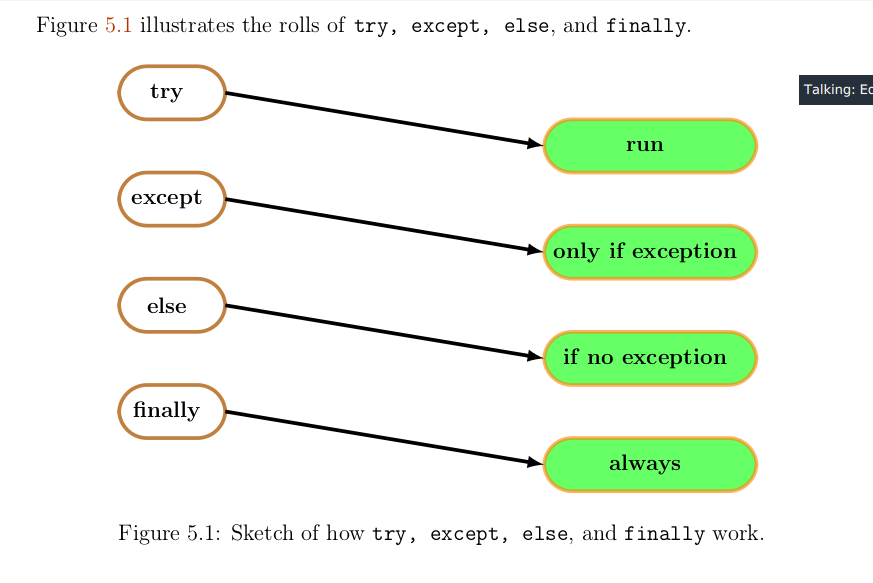


Por ahora vamos a tratar el ```try--except--else``` block

In [18]:
def divideMe(a,b):
    try:
        print("we opened a file")
        c=a/b

    except Exception as er:
        print(er)
        print("we close the file")
    else:
        print("we close file after doing some work")
    return

a=5
b=0
divideMe(a,b)
print("bye")


we opened a file
division by zero
we close the file
bye


In [19]:
b=5
divideMe(a,b)

we opened a file
we close file after doing some work


Que tal si despues de todo eso queremos seguir haciendo otro trabajo.
Necesitamos agregar el ```finally``` (ver la figura de arriba)

El bloque es:
```try--except--else--finally```

In [20]:
def divideMe(a,b):
    try:
        print("we opened a file")
        c=a/b # critical statement
    except Exception as er:
        print(er)
    else:
        print("we close the file after doing some work")
    finally:
        print("I need to do this, no matter what happens above")
        print("for example I can close the file here")
    return

a=5
b=0
divideMe(a,b)
print("bye")


we opened a file
division by zero
I need to do this, no matter what happens above
for example I can close the file here
bye


In [21]:
a=5
b=3
divideMe(a,b)

we opened a file
we close the file after doing some work
I need to do this, no matter what happens above
for example I can close the file here


En este caso existe el riesgo de cerrar el archivo dos veces.
Se puede evitar esto?

In [24]:
def divideMe(a,b):
    flagOpen = 0   # bandera
    try:
        print("we opened a file") # simulacion
        flagOpen = 1
        c = a/b # critical statement
    except Exception as er:
        print(er)
    else:
        if flagOpen:
            print("cerramos archivo abierto luego de algun trabajo")
            flagOpen = 0
    finally:
        print("I need to to this, no matter what")
        if flagOpen:
            print("we close the file after doing some work")

a=5
b=0

divideMe(a,b)

we opened a file
division by zero
I need to to this, no matter what
we close the file after doing some work


In [25]:
a=5
b=5
divideMe(a,b)

we opened a file
cerramos archivo abierto luego de algun trabajo
I need to to this, no matter what


## Assertions:
La sintaxis de assertions es:

```assert Expression[, Arguments] ```

La "assertions" se usan para detectar errores en los programas (bugs).
Algunos puntos de las "assertions":

* La ```assert``` retorna una variable buleana que se suponde debe ser certa ```True```.
* La ```assert``` puede tener un mensaje opcional que indique que error posiblemente se cometio.
* La ```assert``` se usa para verificar tipos, valores de argumentos y salidas de funciones matematicas.



In [30]:
# ejemplos de assert
def avg(speeds):
    n = len(speeds)
    assert n != 0
    return sum(speeds)/n


vels = []
print("Average of speeds", avg(vels))
print("bye")

AssertionError: ignored

In [29]:
def avg(speeds):
    n=len(speeds)
    assert n != 0,   "chequea el tamano de la lista"
    return sum(speeds)/n

vels1=[1,3,5,7]
vels2=[]

print("Average of Speeds", avg(vels1))
print("Average of speed", avg(vels2))

Average of Speeds 4.0


AssertionError: ignored